In [149]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import os
from rasterio.plot import show

In [150]:
srcPath = '20191127_20191129/'
dstPath = 'reprojected/20191127_20191129/'

In [151]:
lstRst = [band for band in os.listdir(srcPath) if band.endswith(".tif")]
lstRst
# len(lstRst)

['band3.tif', 'band2.tif', 'band4.tif', 'band8.tif']

In [152]:
expRst = rasterio.open(srcPath + lstRst[0])
expRst.crs

CRS.from_epsg(4326)

In [153]:
dstCrs = {'init': 'EPSG:32636'}

In [154]:
def reprojectRaster(srcRst, dstRst, dstCrs, srcPath, dstPath) :
    srcRst = rasterio.open(srcPath + srcRst)

    #calculate transform array and shape of reprojected raster
    transform, width, height = calculate_default_transform(
        srcRst.crs, dstCrs, srcRst.width, srcRst.height, *srcRst.bounds)
    
    # working of the meta for the destination raster
    kwargs = srcRst.meta.copy()
    kwargs.update({
        'crs': dstCrs,
        'transform': transform,
        'width': width,
        'height': height
        })
    
    #open destination raster
    dstRst = rasterio.open(dstPath + dstRst, 'w', **kwargs)
    
    #reproject and save raster band 
    for i in range (1, srcRst.count + 1):
        reproject(
            source=rasterio.band(srcRst, i),
            destination=rasterio.band(dstRst, i),
            #src_transform=srcRst.transform,
            src_crs=srcRst.crs,
            #dst_transform=transform,
            dst_crs=dstCrs,
            resampling=Resampling.nearest)
    
    #close destination raster
    dstRst.close()
    

In [155]:
for srcRst in lstRst:
    dstRst = "reprojected_" + srcRst[0:] 
    reprojectRaster(srcRst, dstRst, dstCrs, srcPath, dstPath)
    print("Reprojection of %s done"%srcRst)
    

Reprojection of band3.tif done
Reprojection of band2.tif done
Reprojection of band4.tif done
Reprojection of band8.tif done


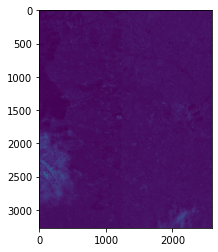

In [158]:
import matplotlib.pyplot as plt
band_data = plt.imread('reprojected/20191127_20191129/reprojected_band2.tif')
plt.imshow(band_data)

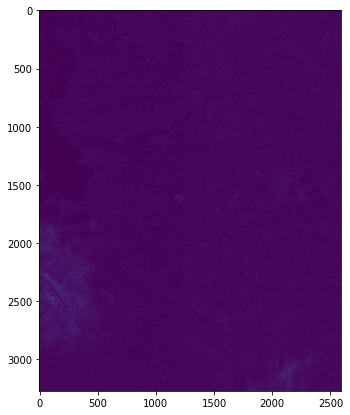

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 7))
# band_data = '/reprojected/band2.tif'
plt.imshow(band_data, vmin=0, vmax=500)